In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [20]:
from helpers import load_data

# load dataset
x, y = load_data()

In [27]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [51]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test_indices = k_indices[k]
    train_indices = np.delete(k_indices, k, axis=0).flatten()
    train_y = y[train_indices]
    train_x = x[train_indices]
    test_y = y[test_indices]
    test_x = x[test_indices]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    train_tx, test_tx = build_poly(train_x, degree), build_poly(test_x, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    train_rmse, train_w  = ridge_regression(train_y, train_tx, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    test_rmse = compute_rmse(test_y, test_tx, train_w)
    return train_rmse, test_rmse

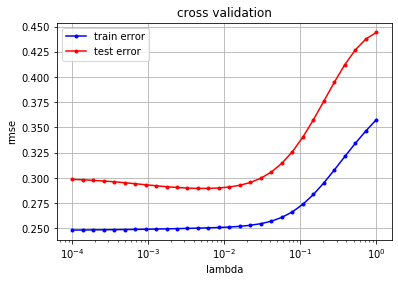

In [62]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for lambda_ in lambdas:
        curr_rmse_tr, curr_rmse_te = 0, 0
        for fold in range(k_fold):
            train_rmse, test_rmse = cross_validation(y, x, k_indices, fold, lambda_, degree)
            curr_rmse_tr += train_rmse
            curr_rmse_te += test_rmse
        rmse_tr.append(curr_rmse_tr / k_fold)
        rmse_te.append(curr_rmse_te / k_fold)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    return lambdas[np.argmin(rmse_te)]

best_lambda = cross_validation_demo()

7

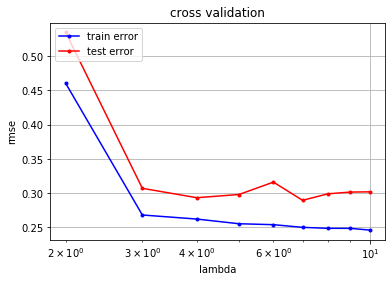

In [78]:
def cross_validate_degree():
    seed = 1
    degrees = range(2, 11)
    k_fold = 4
    lambda_ = best_lambda
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for degree in degrees:
        curr_rmse_tr, curr_rmse_te = 0, 0
        for fold in range(k_fold):
            train_rmse, test_rmse = cross_validation(y, x, k_indices, fold, lambda_, degree)
            curr_rmse_tr += train_rmse
            curr_rmse_te += test_rmse
        rmse_tr.append(curr_rmse_tr / k_fold)
        rmse_te.append(curr_rmse_te / k_fold)
    cross_validation_visualization(degrees, rmse_tr, rmse_te)
    return degrees[np.argmin(rmse_te)]

cross_validate_degree()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

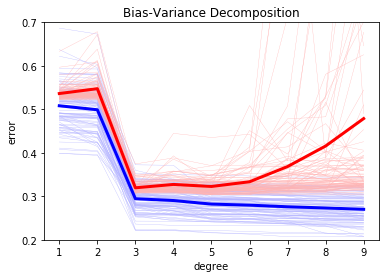

In [69]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        train_x, train_y, test_x, test_y = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for degree in degrees:
            train_tx = build_poly(train_x, degree)
            test_tx = build_poly(test_x, degree)
            train_mse, train_w = least_squares(train_y, train_tx)
            test_mse = compute_mse(test_y, test_tx, train_w)
            rmse_tr_curr, rmse_te_curr = np.sqrt(2*train_mse), np.sqrt(2*test_mse)
            rmse_tr[seed, degree - 1] = rmse_tr_curr
            rmse_te[seed, degree - 1] = rmse_te_curr

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()